In [68]:
"""
Created 4/11/2022

@author: Mithrandir - Şaban Kara
"""
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from utils import *

In [69]:
# Generate some data
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


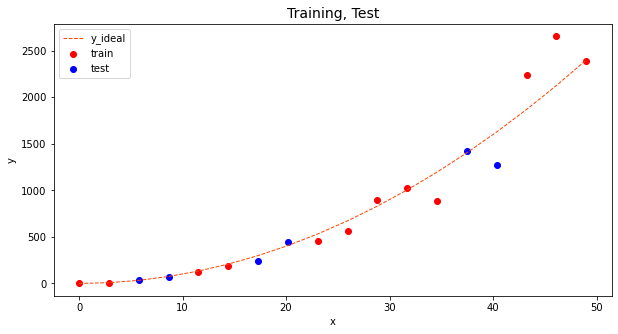

In [70]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()


'''
Aşağıda, eğitimin parçası olacak (kırmızı renkte) veri noktalarının,
modelin eğitilmediği (test) veri noktalarıyla karıştırıldığını görebilirsiniz.
Bu özel veri seti, gürültü eklenmiş ikinci dereceden bir fonksiyondur.
'''

In [71]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

error:  0.0050000000000000305


0.0050000000000000305

In [72]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


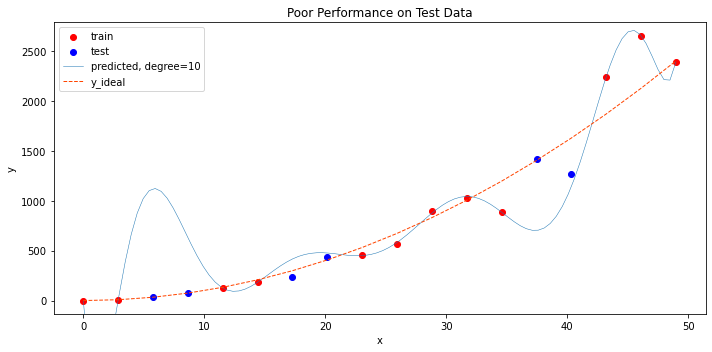

'\nModel, eğitim verilerine çok iyi uymaktadır. \nTest verileri eğitimin bir parçası değil ve model bu veriler üzerinde tahmin yapmakta yetersiz kalıyor.\nBu model;\n*fazla uyuyor ve yüksek varyansa sahip\n'

In [73]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, 10)

'''
Model, eğitim verilerine çok iyi uymaktadır. 
Test verileri eğitimin bir parçası değil ve model bu veriler üzerinde tahmin yapmakta yetersiz kalıyor.
Bu model;
*fazla uyuyor ve yüksek varyansa sahip
'''

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


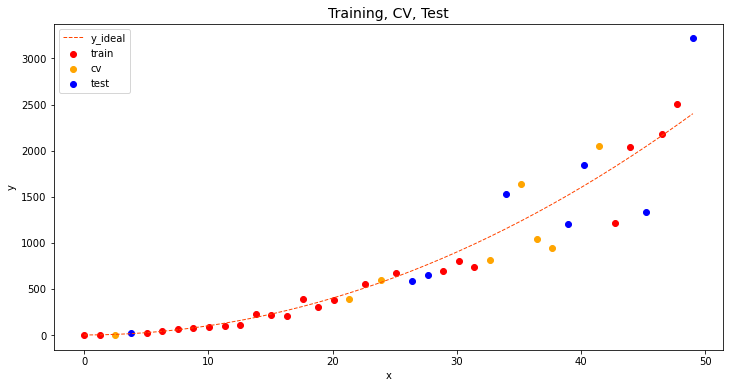

'\nDerece çok büyüdükçe, çapraz doğrulama performansı eğitim performansına göre düşmeye başlar\n'

In [74]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="cv")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

'''
Derece çok büyüdükçe, çapraz doğrulama performansı eğitim performansına göre düşmeye başlar
'''

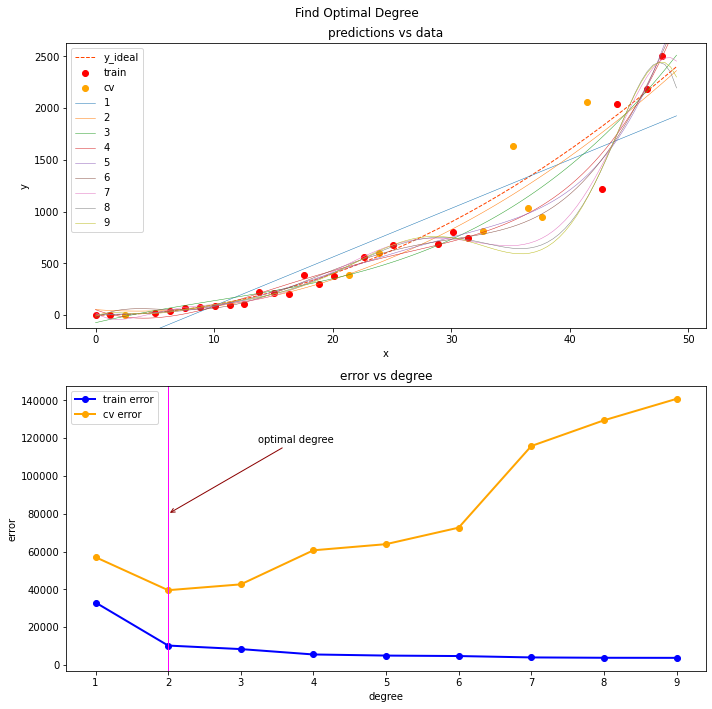

In [75]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    
    err_train[degree] = lmodel.mse(y_train, yhat)
    
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

'''
model karmaşıklığı arttıkça eğitilen verilerdeki (mavi) hata azalır
çapraz doğrulama verilerinin hatası, model verilere uymaya başladığında başlangıçta azalır,
ancak daha sonra model eğitim verilerine fazla uymaya başladığında artar
'''

In [76]:
# Tuning Regularization.
'''
lambda ( 𝜆 ) düzenleme parametresi arttıkça modelin yüksek varyanslı (fazla uydurma) modelden yüksek önyargılı
(eksik uydurma) modele geçtiğini görülmüştür.
'''
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)

print("num_steps :", num_steps )

degree = 10
err_train = np.zeros(num_steps)
print("err_train :", err_train )

err_cv = np.zeros(num_steps)
print("err_cv :", err_cv )

x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

'''
lambda_range arttıkça modelin yüksek varyanslı (fazla uydurma) modelden
yüksek önyargılı (eksik uydurma) modele geçtiğini görülmektedir
'''

num_steps : 10
err_train : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
err_cv : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


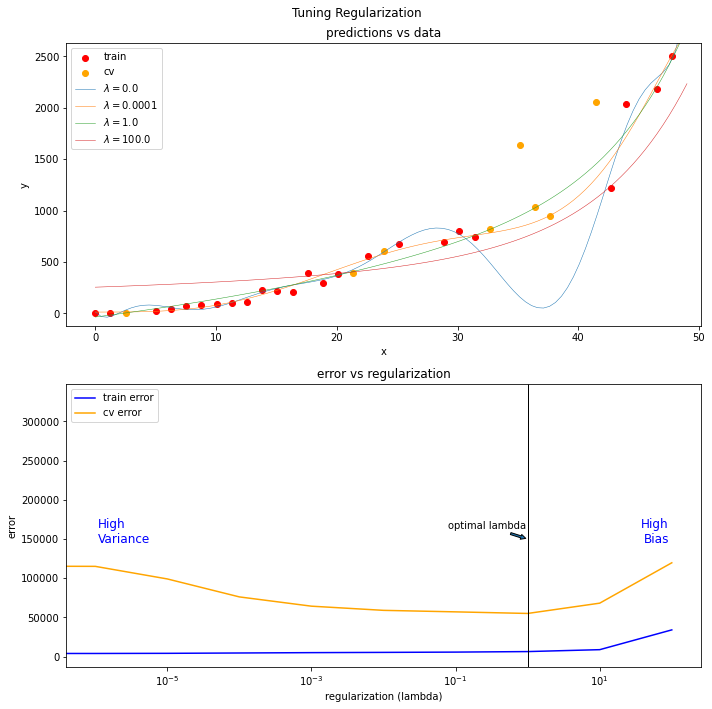

In [77]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

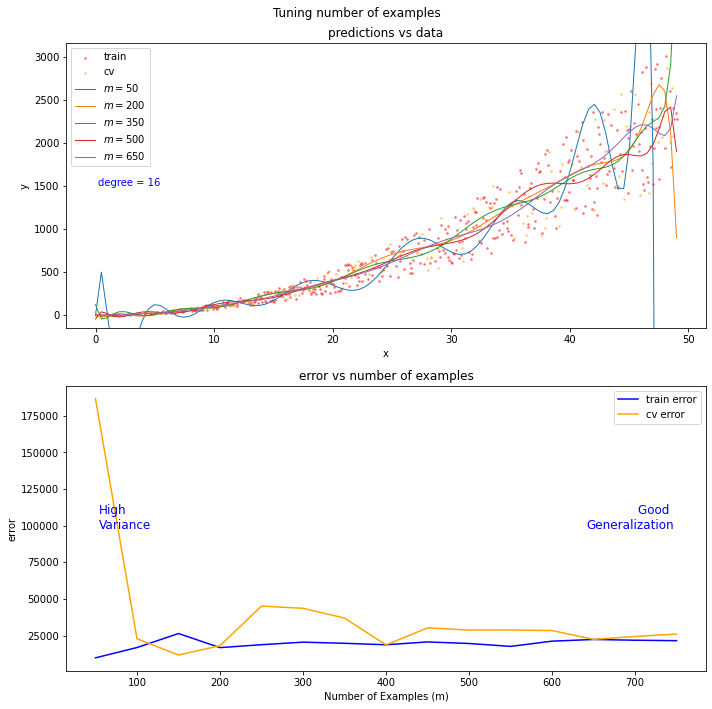

In [78]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

'''
Bir model gereğinden fazla uyduğunda (yüksek varyans)
ek veri toplamak performansı iyileştirebilir.
'''

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


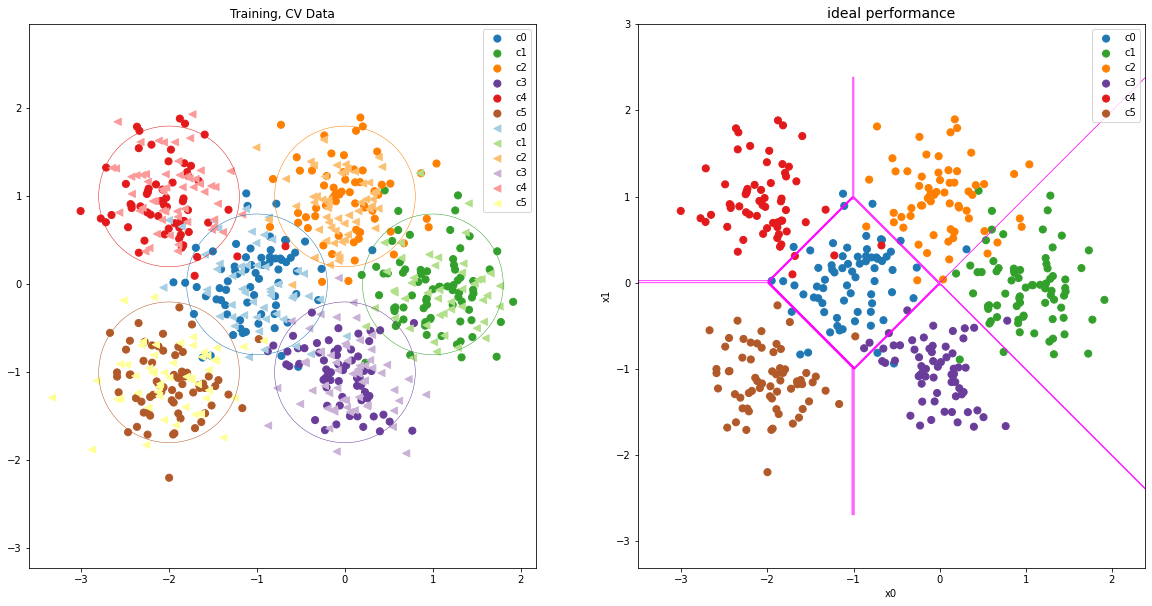

In [79]:
# New Data Set
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

'''
Renkle tanımlanan altı küme vardır.
Hem eğitim noktaları (noktalar) hem de çapraz doğrulama noktaları (üçgenler) gösterilir.
'''

In [80]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250


### Complex model

In [81]:
tf.random.set_seed(1234)
model = Sequential(
    [

        tf.keras.layers.Dense(120, activation="relu"),
        tf.keras.layers.Dense(40, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")

    ], name="Complex"
)
model.compile(

    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),

)

history = model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000


C:\Users\sbnkr\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


13/13 [==============================] - 0s 2ms/step - loss: 1.1291
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4083
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3236
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2756
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2918
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2272
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2019
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2158
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2078
Epoch 13/1000
13/13 [=================

13/13 [==============================] - 0s 2ms/step - loss: 0.1647
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1917
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1592
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1482
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1442
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1570
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1381
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1435
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1444
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1523
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1669
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1067
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1172
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1121
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1014
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1076
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1212
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1023
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1169
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1304
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1411
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1262
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1181
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0669
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0710
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1068
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1025
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1087
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1117
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0963
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0737
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0556
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0550
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0538
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0453
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0952
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0997
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0705
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0548
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0515
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0384
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0763
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0890
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1103
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1894
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1654
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1747
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1751
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1414
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1319
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1286
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1169
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1028
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0650
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0353
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0294
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0301
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0183
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0184
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0135
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0403
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0310
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0719
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0379
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0193
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 995/1000
13/1

Model: "Complex"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 120)               360       
                                                                 
 dense_13 (Dense)            (None, 40)                4840      
                                                                 
 dense_14 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


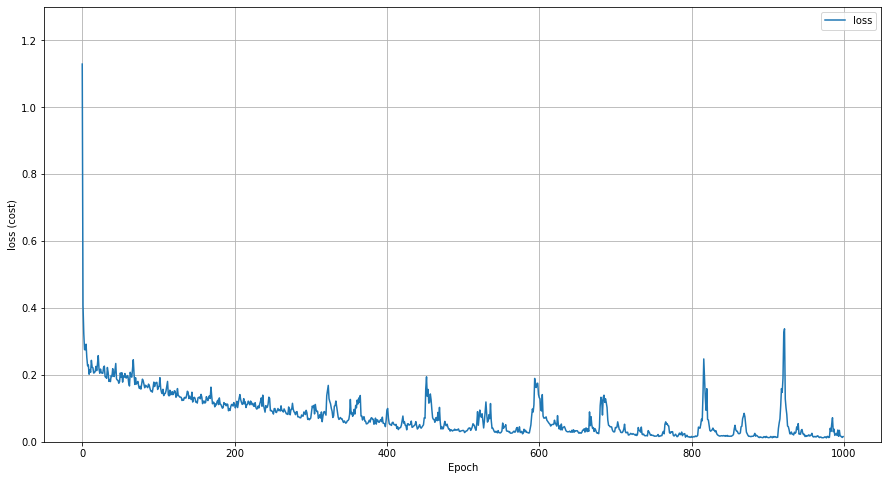

In [82]:
model.summary()
fig,ax = plt.subplots(1,1, figsize = (15,8))

ax.plot(history.history['loss'], label='loss')

ax.set_ylim([0, 1.3])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)

plt.show()

1082/1082 [==============================] - 1s 1ms/step


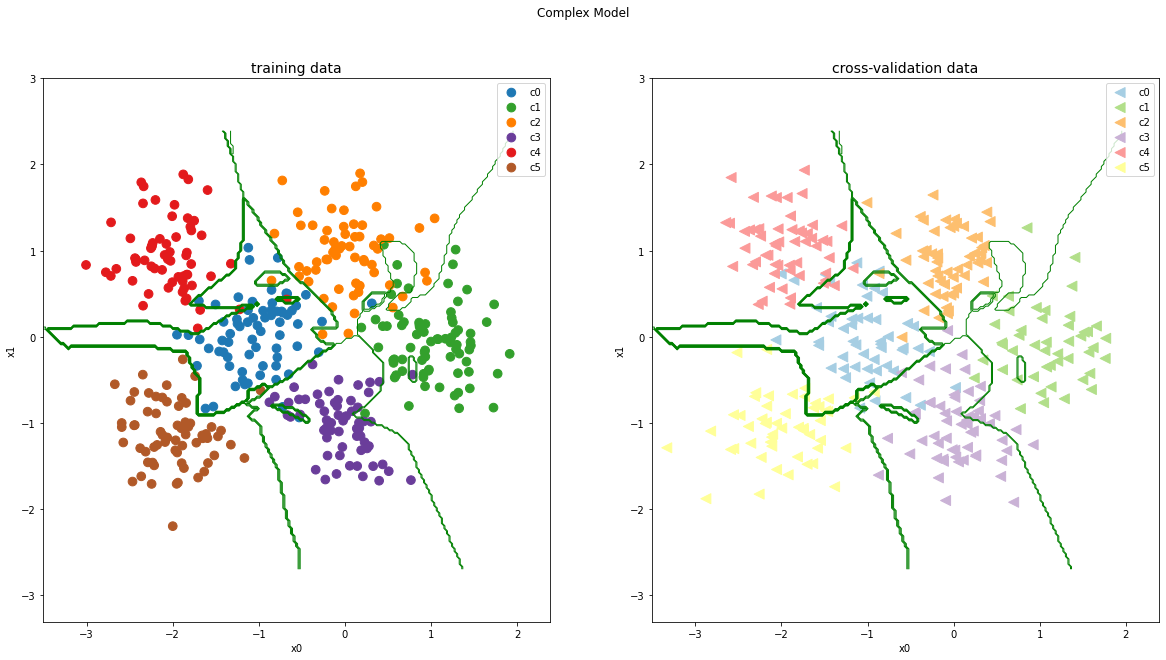

In [83]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [84]:
'''
çapraz doğrulama verilerinin bir kısmını yanlış kategorize etti.
Sınıflandırma hatasını hesabı;
'''

training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 1ms/step
categorization error, training, complex model: 0.005
categorization error, cv,       complex model: 0.125


### Simple Model

In [85]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
 
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(6, activation="linear")

    ], name = "Simple"
)
model_s.compile(

    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),

)

history_ = model_s.fit(
    X_train,y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 2.0020
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7056
Epoch 3/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.5367
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.3578
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1779
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0060
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.8671
Epoch 8/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7554
Epoch 9/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.6727
Epoch 10/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.5993
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5258
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 1ms/step - loss: 0.1965
Epoch 102/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1973
Epoch 103/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1972
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1948
Epoch 105/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1924
Epoch 106/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1918
Epoch 107/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1912
Epoch 108/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1937
Epoch 110/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 111/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1914
Epoch 112/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1938
Epoch 113/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1907
Epoch 200/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1865
Epoch 201/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1858
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1844
Epoch 203/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1848
Epoch 204/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1855
Epoch 205/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1839
Epoch 206/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1884
Epoch 207/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 208/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 209/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 210/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1880
Epoch 211/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1854
Epoch 298/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 299/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1829
Epoch 300/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1843
Epoch 301/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 302/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1885
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1828
Epoch 304/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1898
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 306/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1822
Epoch 307/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1835
Epoch 308/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1858
Epoch 309/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1796
Epoch 396/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1822
Epoch 397/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1854
Epoch 398/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1829
Epoch 399/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1812
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1825
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1803
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1812
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 404/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1810
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1789
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1797
Epoch 407/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1803
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1795
Epoch 495/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1787
Epoch 496/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1851
Epoch 497/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 498/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1799
Epoch 499/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1799
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1775
Epoch 501/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 502/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1798
Epoch 503/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 504/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1779
Epoch 505/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1803
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1803
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1791
Epoch 594/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1777
Epoch 595/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 596/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1778
Epoch 597/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 598/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1775
Epoch 599/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1761
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1808
Epoch 601/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1790
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1802
Epoch 603/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1785
Epoch 690/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1762
Epoch 691/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1789
Epoch 692/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1777
Epoch 693/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1766
Epoch 694/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 695/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1766
Epoch 696/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 697/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1818
Epoch 698/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1795
Epoch 699/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1785
Epoch 700/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 701/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 788/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1758
Epoch 789/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1788
Epoch 790/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1779
Epoch 791/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1759
Epoch 792/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1768
Epoch 793/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1772
Epoch 794/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1850
Epoch 795/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1726
Epoch 796/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1850
Epoch 797/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1765
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1785
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1746
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1766
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1766
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1787
Epoch 891/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 892/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 893/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1753
Epoch 894/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1773
Epoch 895/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 896/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1766
Epoch 897/1000
13/1

13/13 [==============================] - 0s 1ms/step - loss: 0.1769
Epoch 984/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 985/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1736
Epoch 986/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1760
Epoch 987/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1752
Epoch 988/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1759
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 990/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 991/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 992/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1765
Epoch 993/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 994/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1746
Epoch 995/1000
13/1

Model: "Simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 18        
                                                                 
 dense_16 (Dense)            (None, 6)                 42        
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


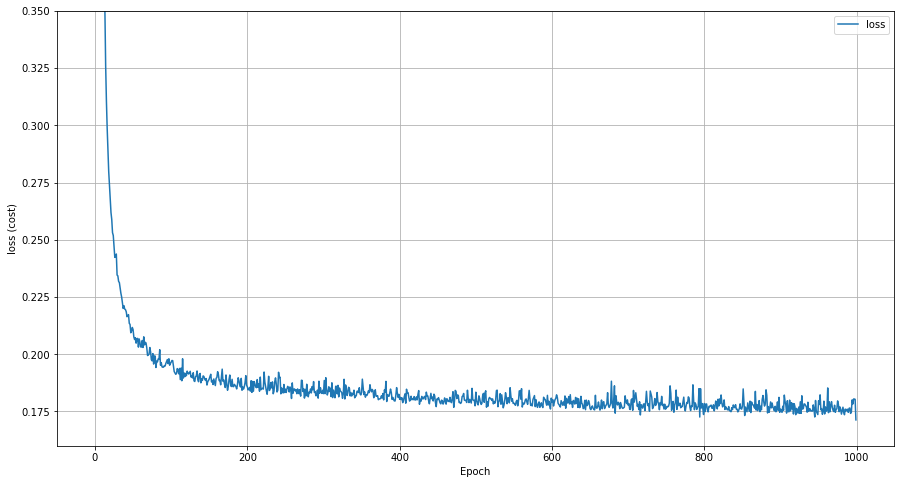

In [97]:
model_s.summary()
fig,ax = plt.subplots(1,1, figsize = (15,8))

ax.plot(history_.history['loss'], label='loss')

ax.set_ylim([0.16, 0.35])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)

plt.show()

1082/1082 [==============================] - 1s 958us/step


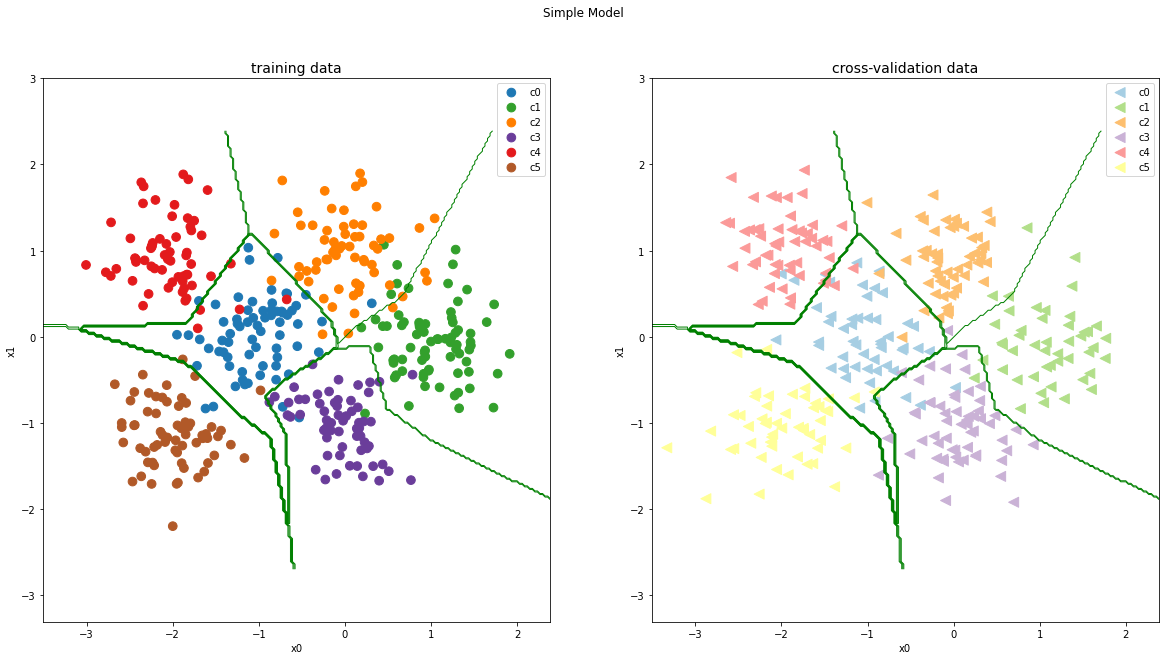

In [87]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [89]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

'''
Basit modelimiz, eğitim verilerinde biraz daha yüksek sınıflandırma hatasına sahiptir,
ancak çapraz doğrulama verilerinde daha karmaşık modele göre daha iyidir.
'''

10/10 [==============================] - 0s 1ms/step
categorization error, training, simple model, 0.068, complex model: 0.005
categorization error, cv,       simple model, 0.075, complex model: 0.125


### Regularization

In [90]:
#  Regularization
tf.random.set_seed(1234)
model_r = Sequential(
    [

        tf.keras.layers.Dense(120, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation="linear")

    ], name= None
)
model_r.compile(
    
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    
)

history_r = model_r.fit(
                    X_train, y_train,
                    epochs=1000
            )

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 4.4218
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7555
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.3742
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0831
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0032
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9527
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9540
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8890
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8176
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7700
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7658
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7636
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.4816
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4660
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4674
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4596
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4911
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4421
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4628
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4732
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4611
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4519
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4508
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4483
Epoch 113/1000
13/1

13/13 [==============================] - 0s 3ms/step - loss: 0.4022
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4051
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3949
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3955
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4058
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4525
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4308
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4096
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4138
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4118
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3758
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4007
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3982
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4310
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4029
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3908
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3792
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3769
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3809
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3842
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3923
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3798
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3845
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3686
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3726
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3573
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3564
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3539
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3458
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3500
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3696
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3909
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 500/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3619
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3618
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3916
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3635
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3413
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3321
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4108
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3955
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3512
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3402
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3519
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3301
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3950
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3479
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3454
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3353
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3288
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3483
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3377
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3473
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3408
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3273
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3332
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3730
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3607
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3405
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3612
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3721
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3212
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3644
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3459
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3250
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3291
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3319
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3864
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3509
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3094
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3260
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3386
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3441
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3632
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3411
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3256
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3358
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3237
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3190
Epoch 995/1000
13/1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 120)               360       
                                                                 
 dense_18 (Dense)            (None, 40)                4840      
                                                                 
 dense_19 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________


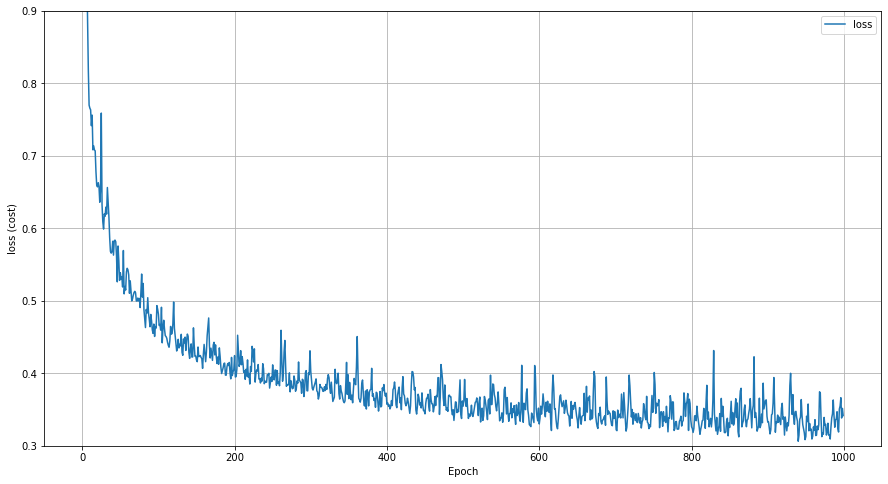

In [96]:
model_r.summary()
fig,ax = plt.subplots(1,1, figsize = (15,8))

ax.plot(history_r.history['loss'], label='loss')

ax.set_ylim([0.3, 0.9])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)

plt.show()

1082/1082 [==============================] - 1s 1ms/step


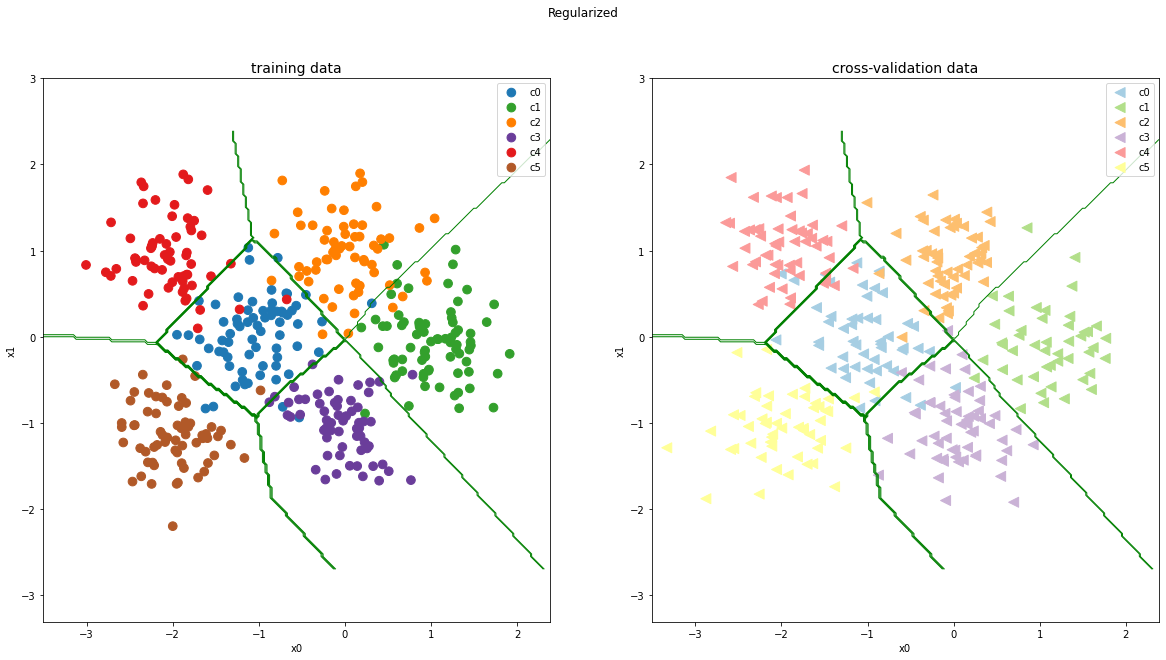

In [98]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [99]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

'''
Basit model, eğitim setinde düzenli modelden biraz daha iyidir ancak çapraz doğrulama setinde daha kötüdür.
'''

3/3 [==============================] - 0s 2ms/step
categorization error, training, regularized: 0.065, simple model, 0.068, complex model: 0.005
categorization error, cv,       regularized: 0.059, simple model, 0.075, complex model: 0.125


In [100]:
# Iterate to find optimal regularization value

tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")

Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0661
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3783
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3098
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3084
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2478
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2233
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2244
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2032
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2172
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2022
Epoch 13/1000
13/13 [====

13/13 [==============================] - 0s 2ms/step - loss: 0.1492
Epoch 102/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1527
Epoch 103/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738
Epoch 104/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1500
Epoch 105/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1413
Epoch 106/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1480
Epoch 107/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 108/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1452
Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1457
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1430
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1472
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1470
Epoch 113/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1076
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1035
Epoch 201/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 202/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1022
Epoch 203/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 204/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1009
Epoch 205/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0961
Epoch 206/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1199
Epoch 207/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1651
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1523
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1059
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0990
Epoch 211/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 299/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 300/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0573
Epoch 301/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 302/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0663
Epoch 303/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0767
Epoch 304/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0664
Epoch 305/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0746
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 309/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0968
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1149
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0723
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 400/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1929
Epoch 401/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1648
Epoch 402/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 403/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1060
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0517
Epoch 407/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 495/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0344
Epoch 496/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 497/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 498/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0376
Epoch 499/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 500/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0333
Epoch 501/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0361
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0617
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0658
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 505/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0561
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0734
Epoch 593/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 594/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0708
Epoch 595/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2097
Epoch 596/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2114
Epoch 597/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2979
Epoch 598/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2163
Epoch 599/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2267
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1487
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1415
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 603/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 691/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 692/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 693/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0437
Epoch 694/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0408
Epoch 695/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0494
Epoch 696/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0386
Epoch 697/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0363
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0342
Epoch 701/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 789/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0395
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 794/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0274
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 799/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0338
Epoch 887/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0362
Epoch 888/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 889/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 890/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0279
Epoch 891/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0290
Epoch 892/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 893/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0337
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 897/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 985/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0305
Epoch 986/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 987/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0291
Epoch 988/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0359
Epoch 989/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 990/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1036
Epoch 991/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0540
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 995/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2443
Epoch 83/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2375
Epoch 84/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2379
Epoch 85/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2486
Epoch 86/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2294
Epoch 87/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 88/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2326
Epoch 89/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2256
Epoch 90/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2247
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2205
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2184
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2219
Epoch 94/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2202
Epoch 182/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2103
Epoch 183/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2094
Epoch 184/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2061
Epoch 185/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2103
Epoch 186/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2063
Epoch 187/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2048
Epoch 188/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2057
Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2040
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2116
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2067
Epoch 193/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2015
Epoch 280/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2002
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1992
Epoch 282/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1948
Epoch 283/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2047
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1887
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1940
Epoch 287/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1948
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2159
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2087
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2110
Epoch 291/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1837
Epoch 378/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 379/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1904
Epoch 380/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1838
Epoch 381/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 382/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1916
Epoch 383/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2039
Epoch 384/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2007
Epoch 385/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1852
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1930
Epoch 389/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2038
Epoch 476/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1880
Epoch 477/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2017
Epoch 478/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1984
Epoch 479/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 480/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1841
Epoch 481/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1799
Epoch 482/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1834
Epoch 483/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1991
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1840
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1783
Epoch 487/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1740
Epoch 574/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1702
Epoch 575/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1675
Epoch 576/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1671
Epoch 577/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1743
Epoch 578/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1767
Epoch 579/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1674
Epoch 580/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1784
Epoch 581/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1745
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1661
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1722
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1764
Epoch 585/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1647
Epoch 672/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1693
Epoch 673/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1663
Epoch 674/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1738
Epoch 675/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1781
Epoch 676/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1644
Epoch 677/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1598
Epoch 678/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1696
Epoch 679/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1771
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1741
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1768
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1770
Epoch 683/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 770/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1622
Epoch 771/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1704
Epoch 772/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1582
Epoch 773/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1697
Epoch 774/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1757
Epoch 775/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1744
Epoch 776/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1563
Epoch 777/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1623
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1688
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1736
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1600
Epoch 781/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 868/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1588
Epoch 869/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573
Epoch 870/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1725
Epoch 871/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1690
Epoch 872/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1527
Epoch 873/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1544
Epoch 874/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1573
Epoch 875/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1595
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1555
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1585
Epoch 879/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.1605
Epoch 966/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 967/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1714
Epoch 968/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1876
Epoch 969/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1638
Epoch 970/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1640
Epoch 971/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1516
Epoch 972/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1495
Epoch 973/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1577
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1579
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1547
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.1513
Epoch 977/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3513
Epoch 65/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3619
Epoch 66/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3365
Epoch 67/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 68/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3503
Epoch 69/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3249
Epoch 70/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3233
Epoch 71/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3207
Epoch 72/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2985
Epoch 73/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 74/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 75/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 76/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.2733
Epoch 164/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2884
Epoch 165/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2876
Epoch 166/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2949
Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2824
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2822
Epoch 170/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2790
Epoch 171/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 172/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2621
Epoch 173/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2804
Epoch 174/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2962
Epoch 175/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2760
Epoch 262/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 263/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 264/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2514
Epoch 265/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2653
Epoch 266/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 267/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 268/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2564
Epoch 269/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 270/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 271/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2498
Epoch 272/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2572
Epoch 273/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2462
Epoch 360/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2727
Epoch 361/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2508
Epoch 362/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 363/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2730
Epoch 364/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2569
Epoch 365/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2522
Epoch 366/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2571
Epoch 367/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2700
Epoch 368/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2615
Epoch 369/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2502
Epoch 370/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2495
Epoch 371/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2323
Epoch 458/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 459/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2398
Epoch 460/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2416
Epoch 461/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 462/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2393
Epoch 463/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2353
Epoch 464/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2389
Epoch 465/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2435
Epoch 466/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2468
Epoch 467/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2428
Epoch 468/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2443
Epoch 469/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2370
Epoch 556/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2263
Epoch 557/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 558/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2414
Epoch 559/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2513
Epoch 560/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2510
Epoch 561/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2342
Epoch 562/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 563/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2278
Epoch 564/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 565/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2328
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2404
Epoch 567/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2215
Epoch 654/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2411
Epoch 655/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2303
Epoch 656/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2304
Epoch 657/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2302
Epoch 658/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2301
Epoch 659/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2295
Epoch 660/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 661/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2227
Epoch 662/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2357
Epoch 663/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2333
Epoch 664/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 665/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2291
Epoch 752/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2383
Epoch 753/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 754/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 755/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2279
Epoch 756/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2325
Epoch 757/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 758/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2256
Epoch 759/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2234
Epoch 760/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2362
Epoch 761/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2327
Epoch 762/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 763/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2254
Epoch 850/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2206
Epoch 851/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2309
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 853/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2348
Epoch 854/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2354
Epoch 855/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 856/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2251
Epoch 857/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2276
Epoch 858/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2232
Epoch 859/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2318
Epoch 860/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2264
Epoch 861/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2334
Epoch 948/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 949/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2227
Epoch 950/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2151
Epoch 951/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2260
Epoch 952/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2464
Epoch 953/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2292
Epoch 954/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2354
Epoch 955/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2204
Epoch 956/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2262
Epoch 957/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2329
Epoch 958/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2443
Epoch 959/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4751
Epoch 47/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4376
Epoch 48/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4840
Epoch 49/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4752
Epoch 50/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4460
Epoch 51/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4619
Epoch 52/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4481
Epoch 53/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4615
Epoch 54/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4378
Epoch 55/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4654
Epoch 56/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4289
Epoch 57/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4518
Epoch 58/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 146/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 147/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3892
Epoch 148/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 149/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3633
Epoch 150/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3635
Epoch 151/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3619
Epoch 152/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3577
Epoch 153/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3815
Epoch 154/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3619
Epoch 155/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3625
Epoch 156/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3658
Epoch 157/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3350
Epoch 244/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3467
Epoch 245/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 246/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3412
Epoch 247/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3305
Epoch 248/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 249/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3521
Epoch 250/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3409
Epoch 251/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3677
Epoch 252/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 253/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3434
Epoch 254/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3591
Epoch 255/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3296
Epoch 342/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3367
Epoch 343/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3293
Epoch 344/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3236
Epoch 345/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 346/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3229
Epoch 347/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3437
Epoch 348/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3617
Epoch 349/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3199
Epoch 350/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3438
Epoch 351/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3190
Epoch 352/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 353/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3094
Epoch 440/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3097
Epoch 441/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3160
Epoch 442/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3265
Epoch 443/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 444/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3156
Epoch 445/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3269
Epoch 446/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3159
Epoch 447/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3384
Epoch 448/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 449/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3122
Epoch 450/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3146
Epoch 451/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3570
Epoch 538/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3197
Epoch 539/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2944
Epoch 540/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3166
Epoch 541/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3287
Epoch 542/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3362
Epoch 543/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3243
Epoch 544/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3172
Epoch 545/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3058
Epoch 546/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3187
Epoch 547/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3345
Epoch 548/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 549/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3355
Epoch 636/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3206
Epoch 637/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3152
Epoch 638/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3080
Epoch 639/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 640/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 641/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2953
Epoch 642/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 643/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3314
Epoch 644/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3027
Epoch 645/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3203
Epoch 646/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3303
Epoch 647/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2981
Epoch 734/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 735/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3150
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3135
Epoch 737/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3319
Epoch 738/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3057
Epoch 740/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3147
Epoch 741/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3244
Epoch 742/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3645
Epoch 743/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3211
Epoch 744/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 745/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3088
Epoch 832/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3202
Epoch 833/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3227
Epoch 834/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2916
Epoch 835/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2973
Epoch 836/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 837/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3006
Epoch 838/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3013
Epoch 839/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2960
Epoch 840/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3069
Epoch 841/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2883
Epoch 842/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3120
Epoch 843/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 930/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 931/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 932/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3261
Epoch 933/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3012
Epoch 934/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3310
Epoch 935/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3000
Epoch 936/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2907
Epoch 937/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2891
Epoch 938/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3086
Epoch 939/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 940/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2912
Epoch 941/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.6221
Epoch 29/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6033
Epoch 30/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6256
Epoch 31/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6208
Epoch 32/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6433
Epoch 33/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6280
Epoch 34/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6761
Epoch 35/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6663
Epoch 36/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6229
Epoch 37/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5849
Epoch 38/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5684
Epoch 39/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5788
Epoch 40/1000
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.4469
Epoch 128/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4399
Epoch 129/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4421
Epoch 130/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4389
Epoch 131/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4699
Epoch 132/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4387
Epoch 133/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4256
Epoch 134/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 135/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4389
Epoch 136/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4496
Epoch 137/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4346
Epoch 138/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4546
Epoch 139/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4369
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4379
Epoch 227/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4621
Epoch 228/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 229/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4047
Epoch 230/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4138
Epoch 231/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4115
Epoch 232/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4153
Epoch 233/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3953
Epoch 234/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3981
Epoch 235/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3919
Epoch 236/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3973
Epoch 237/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4101
Epoch 324/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3966
Epoch 325/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3929
Epoch 326/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3869
Epoch 327/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3760
Epoch 328/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3994
Epoch 329/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3798
Epoch 330/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 331/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3665
Epoch 332/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3707
Epoch 333/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4073
Epoch 334/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3953
Epoch 335/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3780
Epoch 422/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3942
Epoch 423/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3712
Epoch 424/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 425/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3584
Epoch 426/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3576
Epoch 427/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3607
Epoch 428/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3698
Epoch 429/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3642
Epoch 430/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3572
Epoch 431/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3493
Epoch 432/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3590
Epoch 433/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3639
Epoch 520/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3633
Epoch 521/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3422
Epoch 522/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3592
Epoch 523/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3728
Epoch 524/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3356
Epoch 525/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3522
Epoch 526/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 527/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3346
Epoch 528/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3400
Epoch 529/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3672
Epoch 530/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 531/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3242
Epoch 618/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3731
Epoch 619/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4007
Epoch 620/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3875
Epoch 621/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3420
Epoch 622/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3421
Epoch 623/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3389
Epoch 624/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3277
Epoch 625/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3276
Epoch 626/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 627/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3523
Epoch 628/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3628
Epoch 629/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3217
Epoch 716/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3282
Epoch 717/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3484
Epoch 718/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3642
Epoch 719/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4119
Epoch 720/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3937
Epoch 721/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3683
Epoch 722/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3456
Epoch 723/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3518
Epoch 724/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3275
Epoch 725/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3449
Epoch 726/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3399
Epoch 727/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3239
Epoch 814/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3284
Epoch 815/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3337
Epoch 816/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3352
Epoch 817/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 818/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3531
Epoch 819/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 820/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3610
Epoch 821/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3892
Epoch 822/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3359
Epoch 823/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3501
Epoch 824/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3637
Epoch 825/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3236
Epoch 912/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 913/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3178
Epoch 914/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3466
Epoch 915/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3381
Epoch 916/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3330
Epoch 917/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3334
Epoch 918/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3222
Epoch 919/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3497
Epoch 920/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3643
Epoch 921/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3398
Epoch 922/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3354
Epoch 923/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 1.0363
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.0060
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9658
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9475
Epoch 13/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9515
Epoch 14/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9499
Epoch 15/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9069
Epoch 16/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8973
Epoch 17/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.9073
Epoch 18/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8997
Epoch 19/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8718
Epoch 20/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.8472
Epoch 21/1000
13/13 [=========

Epoch 109/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5655
Epoch 110/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5687
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5633
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5549
Epoch 113/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5476
Epoch 114/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5472
Epoch 115/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 116/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5505
Epoch 117/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5854
Epoch 118/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5812
Epoch 119/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5704
Epoch 120/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5617
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5121
Epoch 208/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5212
Epoch 209/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5415
Epoch 210/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5034
Epoch 211/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4934
Epoch 212/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4850
Epoch 213/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4882
Epoch 214/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4838
Epoch 215/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4882
Epoch 216/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5016
Epoch 217/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4907
Epoch 218/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4853
Epoch 219/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4554
Epoch 306/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4830
Epoch 307/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4625
Epoch 308/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 309/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4535
Epoch 310/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4511
Epoch 311/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4425
Epoch 312/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4468
Epoch 313/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4524
Epoch 314/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4573
Epoch 315/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4475
Epoch 316/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4395
Epoch 317/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4314
Epoch 404/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4392
Epoch 405/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 406/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4213
Epoch 407/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4331
Epoch 408/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4496
Epoch 409/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4174
Epoch 410/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4379
Epoch 411/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4617
Epoch 412/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4226
Epoch 413/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4314
Epoch 414/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4432
Epoch 415/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4045
Epoch 502/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4147
Epoch 503/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4366
Epoch 504/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4578
Epoch 505/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4460
Epoch 506/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4566
Epoch 507/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4615
Epoch 508/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4103
Epoch 509/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4093
Epoch 510/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4057
Epoch 511/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4227
Epoch 512/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4124
Epoch 513/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3897
Epoch 600/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4238
Epoch 601/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4398
Epoch 602/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4117
Epoch 603/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4024
Epoch 604/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3940
Epoch 605/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3929
Epoch 606/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4129
Epoch 607/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4085
Epoch 608/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4124
Epoch 609/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4013
Epoch 610/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4272
Epoch 611/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 698/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4140
Epoch 699/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3843
Epoch 700/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3766
Epoch 701/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3916
Epoch 702/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 703/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3702
Epoch 704/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4000
Epoch 705/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3926
Epoch 706/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3972
Epoch 707/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 708/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4050
Epoch 709/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4605
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4535
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4318
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4600
Epoch 799/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4236
Epoch 800/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4043
Epoch 801/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3873
Epoch 802/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3791
Epoch 803/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3732
Epoch 804/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3627
Epoch 805/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3801
Epoch 806/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 807/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4074
Epoch 894/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3795
Epoch 895/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4733
Epoch 896/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 897/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3685
Epoch 898/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3922
Epoch 899/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3906
Epoch 900/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3822
Epoch 901/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4089
Epoch 902/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4034
Epoch 903/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4199
Epoch 904/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 905/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 992/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3601
Epoch 993/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3680
Epoch 994/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 995/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3847
Epoch 996/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3685
Epoch 997/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4004
Epoch 998/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 999/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3828
Epoch 1000/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4076
Finished lambda = 0.2
Epoch 1/1000
13/13 [==============================] - 0s 2ms/step - loss: 10.0763
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.3011

13/13 [==============================] - 0s 2ms/step - loss: 0.6709
Epoch 91/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6753
Epoch 92/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6695
Epoch 93/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6614
Epoch 94/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6587
Epoch 95/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6627
Epoch 96/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6528
Epoch 97/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6574
Epoch 98/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6670
Epoch 99/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6872
Epoch 100/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6961
Epoch 101/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6884
Epoch 102/1000
13/13 [======

Epoch 189/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5691
Epoch 190/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5626
Epoch 191/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5804
Epoch 192/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5749
Epoch 193/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5655
Epoch 194/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5549
Epoch 195/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5576
Epoch 196/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5516
Epoch 197/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5645
Epoch 198/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5548
Epoch 199/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5609
Epoch 200/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5618
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5692
Epoch 288/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5702
Epoch 289/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5275
Epoch 290/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5253
Epoch 291/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5316
Epoch 292/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5114
Epoch 293/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5210
Epoch 294/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5208
Epoch 295/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5503
Epoch 296/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5224
Epoch 297/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5127
Epoch 298/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5133
Epoch 299/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4940
Epoch 386/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4779
Epoch 387/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4971
Epoch 388/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5068
Epoch 389/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4947
Epoch 390/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4806
Epoch 391/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4836
Epoch 392/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4878
Epoch 393/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4820
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4801
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5028
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5218
Epoch 397/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.5055
Epoch 484/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4677
Epoch 485/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4985
Epoch 486/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4692
Epoch 487/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4742
Epoch 488/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4626
Epoch 489/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4543
Epoch 490/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4648
Epoch 491/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4729
Epoch 492/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4955
Epoch 493/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4730
Epoch 494/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4583
Epoch 495/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4874
Epoch 582/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4720
Epoch 583/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4713
Epoch 584/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4456
Epoch 585/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4593
Epoch 586/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5024
Epoch 587/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4665
Epoch 588/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4523
Epoch 589/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 590/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4347
Epoch 591/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4462
Epoch 592/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4423
Epoch 593/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4510
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4313
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4646
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4397
Epoch 683/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4441
Epoch 684/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4340
Epoch 685/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4355
Epoch 686/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4377
Epoch 687/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4350
Epoch 688/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4233
Epoch 689/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4641
Epoch 690/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4539
Epoch 691/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4782
Epoch 778/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5321
Epoch 779/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4551
Epoch 780/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4725
Epoch 781/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4682
Epoch 782/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4265
Epoch 783/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4372
Epoch 784/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4354
Epoch 785/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4156
Epoch 786/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4208
Epoch 787/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4293
Epoch 788/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 789/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4163
Epoch 876/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4279
Epoch 877/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4125
Epoch 878/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4262
Epoch 879/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4209
Epoch 880/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4316
Epoch 881/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4444
Epoch 882/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4638
Epoch 883/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4720
Epoch 884/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4577
Epoch 885/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4466
Epoch 886/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4092
Epoch 887/1000
13/1

13/13 [==============================] - 0s 2ms/step - loss: 0.4116
Epoch 974/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4144
Epoch 975/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3997
Epoch 976/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4056
Epoch 977/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4119
Epoch 978/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4068
Epoch 979/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4340
Epoch 980/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4739
Epoch 981/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4523
Epoch 982/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4434
Epoch 983/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4107
Epoch 984/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4183
Epoch 985/1000
13/1

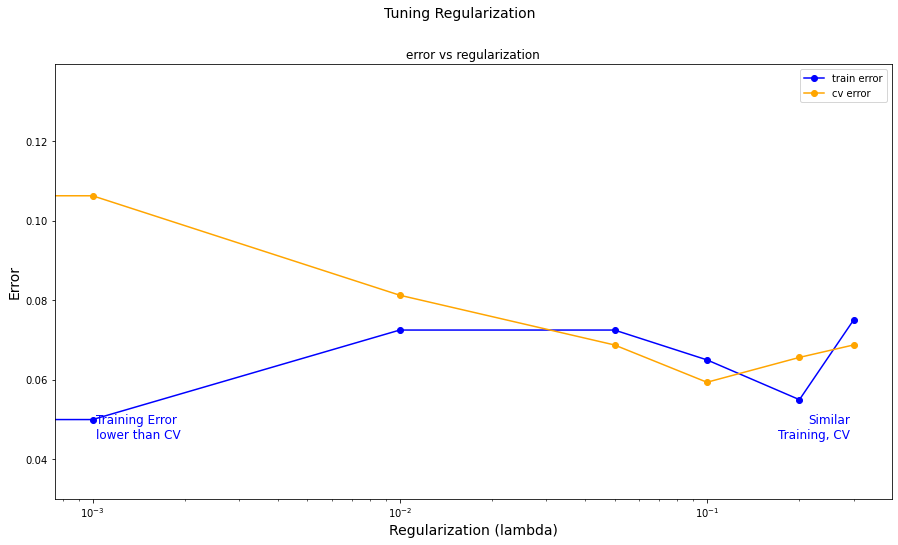

In [101]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)
'''
Düzenlileştirme arttıkça, modelin eğitim ve çapraz doğrulama veri kümeleri üzerindeki performansı birleşir.
'''

3/3 [==============================] - 0s 2ms/step


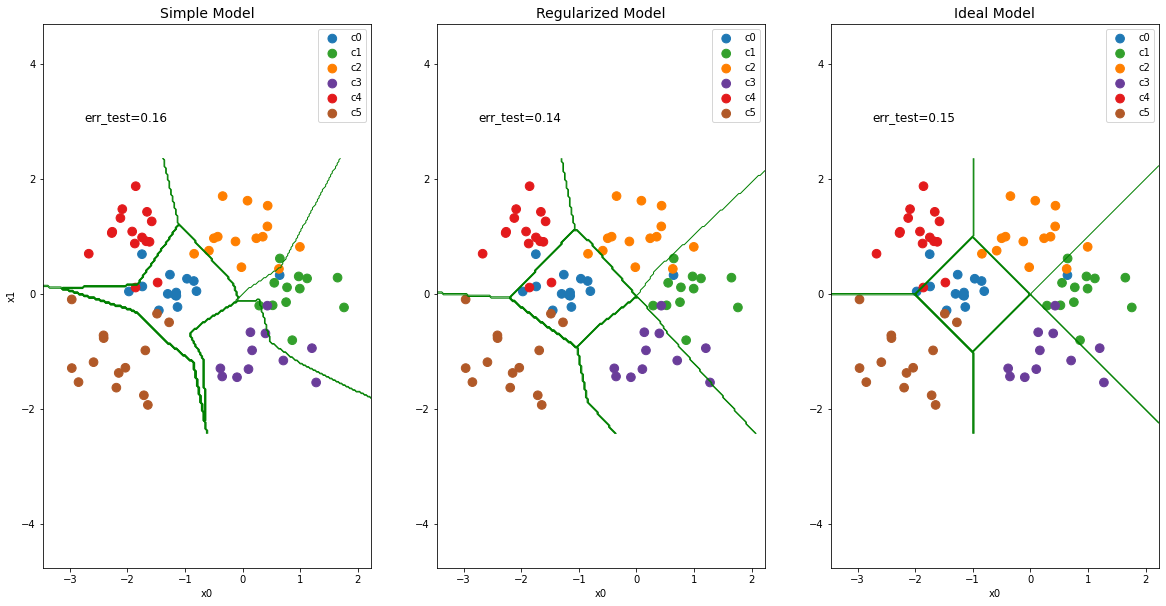

In [106]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

In [88]:
# import numpy as np
# import random

# input_variables = np.array([0,1,2,3,4,5,6,7,8,9])
# sequare = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
# split = 0.77

# X_train = input_variables[:int(split*len(input_variables))]
# X_test = input_variables[int(split*len(input_variables)):len(input_variables)]

# y_train= sequare[:int(split*len(input_variables))]
# y_test = sequare[int(split*len(input_variables)):len(input_variables)]

# print(X_train,"\n",X_test,"\n",y_train,"\n",y_test)